# Tree based methods

In [2]:
%matplotlib inline
from pylab import *
import pandas as pd
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn import model_selection

## Arbres décisionnels CART 

> Télécharger [les donnnées Spam](https://archive.ics.uci.edu/ml/datasets/spambase) depuis la plateforme UCI. Importer les données sous python, par exemple en utilisant pandas. Donner son label à chaque variable. La variable cible $Y$ qui indique la présence d'un spam est en dernière position dans la base de données. Créer deux tableaux numpy X_Spam and Y_Spam pour ce problème de classification.

#### Importation du nom des variables depuis "spambase.names"

Le fichier des noms de variables (prêt à l'emploi, pour vous faire gagner du temps) est disponible [ici](https://box.ec-nantes.fr:443/index.php/s/5SZxSp5ZSFEeGZR).

In [3]:
file_path=  r'/mnt/c/Users/romai/OneDrive/Documents/Centrale/STASC/'
data_path = file_path + "spambase.names"

features_names = pd.read_csv(data_path,delim_whitespace=True,header=None)
#print(features_names.values[:,0])

#### Importation de la table de données au format pandas

In [4]:
data_path = file_path + "spambase.data"
Spam_data = pd.read_csv(data_path, header = None, delimiter = ',', names = features_names.values[:, 0])
Spam_data.describe()

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,Spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [5]:
print(Spam_data.shape)
print(Spam_data.head())

(4601, 58)
   word_freq_make:  word_freq_address:  word_freq_all:  word_freq_3d:  \
0             0.00                0.64            0.64            0.0   
1             0.21                0.28            0.50            0.0   
2             0.06                0.00            0.71            0.0   
3             0.00                0.00            0.00            0.0   
4             0.00                0.00            0.00            0.0   

   word_freq_our:  word_freq_over:  word_freq_remove:  word_freq_internet:  \
0            0.32             0.00               0.00                 0.00   
1            0.14             0.28               0.21                 0.07   
2            1.23             0.19               0.19                 0.12   
3            0.63             0.00               0.31                 0.63   
4            0.63             0.00               0.31                 0.63   

   word_freq_order:  word_freq_mail:  ...  char_freq_;:  char_freq_(:  \
0       

In [6]:
Spam_data.describe()  # le summary de pandas

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,Spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [7]:
X_Spam = Spam_data.values[:,0:57]
Y_Spam = Spam_data.values[:,57]

Y_Spam

array([1., 1., 1., ..., 0., 0., 0.])

> Ajuster un arbre de classification sur les données Spam avec la fonction [tree.DecisionTreeClassifier](http://scikit-learn.org/stable/modules/tree.html#classification) (lire la documentation de cette fonction).

In [8]:
from sklearn import tree
tree_classifier = tree.DecisionTreeClassifier(max_leaf_nodes = 5)
tree_classifier.fit(X_Spam, Y_Spam);

> Représenter l'arbre de classification avec 5 noeuds terminaux (`max_leaf_nodes`)  à l'aide de la fonction `tree.plot_tree`.

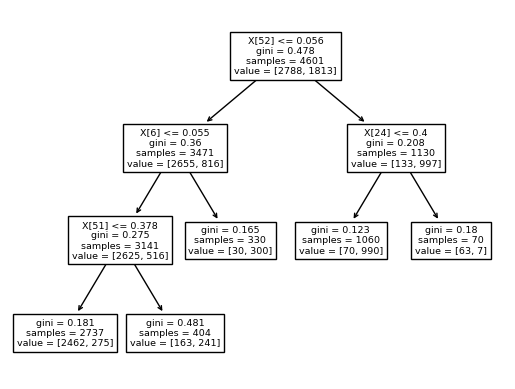

In [9]:
tree.plot_tree(tree_classifier);

> Comparer les performances de l'arbre de classification pour plusieurs choix de nombre maximal de noeuds (`max_leaf_nodes=`). Utiliser une procédure 5-folds avec la fonction `GridSearchCV` pour évaluer  et comparer les erreurs de généralisation. Pensez à imposer une permutation aléatoire des blocs.

Avec 2 noeuds, on obtient un score de 0.7898319407071709.
Avec 4 noeuds, on obtient un score de 0.8469869706840392.
Avec 6 noeuds, on obtient un score de 0.8771949204550819.
Avec 8 noeuds, on obtient un score de 0.893504225086154.
Avec 10 noeuds, on obtient un score de 0.8932847094368125.
Avec 15 noeuds, on obtient un score de 0.9041538025775386.
Avec 20 noeuds, on obtient un score de 0.9121916159184252.
Avec 30 noeuds, on obtient un score de 0.9148029079922579.
Avec 50 noeuds, on obtient un score de 0.9154505971769815.
Avec 100 noeuds, on obtient un score de 0.9171932681867535.
Avec 200 noeuds, on obtient un score de 0.9247986593022706.
Avec 300 noeuds, on obtient un score de 0.9124085351461078.
Avec 400 noeuds, on obtient un score de 0.9141507340792145.
Avec 500 noeuds, on obtient un score de 0.909368361421895.
Avec 800 noeuds, on obtient un score de 0.9082814049001557.


Le meilleur résultat est obtenu pour 200 noeuds.


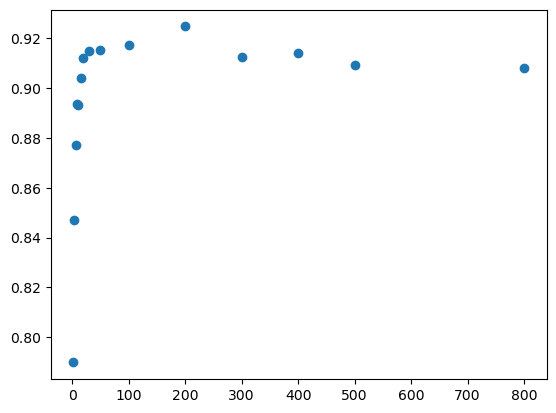

In [12]:
maxnodes = [2,4,6,8,10,15,20,30,50,100,200,300,400,500,800]
scores = []
for maxnode in maxnodes:
    tree_classifier = tree.DecisionTreeClassifier(max_leaf_nodes = maxnode)
    my_kfold = model_selection.KFold(n_splits = 5, shuffle = True)
    score = model_selection.cross_val_score(tree_classifier, X_Spam, Y_Spam, cv=my_kfold, n_jobs = 6)
    print(f"Avec {maxnode} noeuds, on obtient un score de {mean(score)}.")
    scores.append(mean(score))
index_best = scores.index(max(scores))
print(f"\n\nLe meilleur résultat est obtenu pour {maxnodes[index_best]} noeuds.")
plt.scatter(maxnodes, scores);

> Si on appelle `Cart_grid` le résultat de `GridSearchCV`, le détail des scores obtenus sur la grille de paramètres pour chacun des folds est disponible dans le dictionnaire `Cart_grid.cv_results_`.    
> - Afficher l'ensemble des attributs de `Cart_grid.cv_results_`.    
> - Extraire du résultat de gridsearchCV le vecteur des scores moyens obtenus par la procédure 5 folds pour chaque paramètre choisi (attribut `mean_test_score`).  
> - Representer le score (moyen) en fonction du nombre de noeuds terminaux. 

[0.78852358 0.85807983 0.87916018 0.8880685  0.8928504  0.89980456
 0.90719468 0.91132465 0.91502054 0.92197635 0.91806567 0.91632606
 0.91350045 0.91349974 0.91415144]


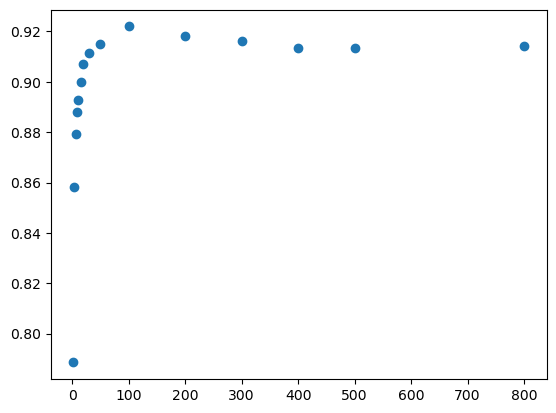

In [11]:
my_kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=0)
Cart_grid = model_selection.GridSearchCV(tree.DecisionTreeClassifier(),
                      {'max_leaf_nodes': maxnodes},
                      cv=my_kfold,
                      n_jobs = 6)
Cart_grid.fit(X_Spam, Y_Spam)
print(Cart_grid.cv_results_["mean_test_score"])
plt.scatter(maxnodes, Cart_grid.cv_results_["mean_test_score"]);

Les performances sont très bonnes car le problème est assez facile mais on observe quand même l'effet du sur-apprentissage pour les arbres les plus developpés. 

> Illustrer l'instabilité des arbres CART sur des arbres de petites tailles (prendre par exemple `max_leaf_nodes=6`). On pourra tirer des échantillons aléatoirement avec remise dans les données initiales (précédure bootstrap) en utilisant la fonction [`resample`](https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html) et comparer finalement (graphiquement) les arbres de décision ainsi ajustés.

First Tree


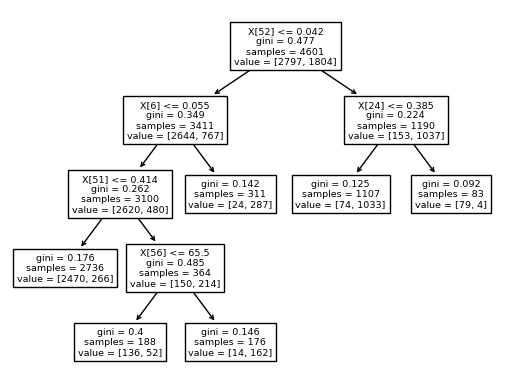

In [23]:
from sklearn.utils import resample

X_Sample1, Y_Sample1 = resample(X_Spam, Y_Spam)
tree_classifier = tree.DecisionTreeClassifier(max_leaf_nodes = 6)
tree_classifier.fit(X_Sample1, Y_Sample1)
print("First Tree")
tree.plot_tree(tree_classifier);

Second Tree


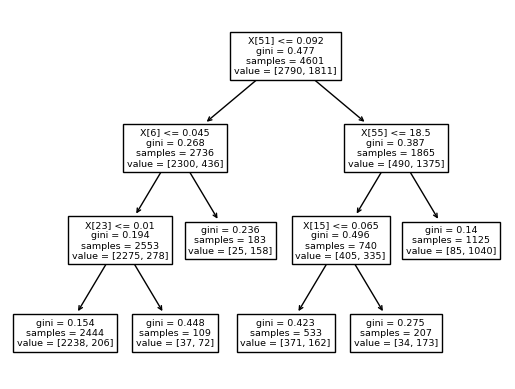

In [21]:
X_Sample2, Y_Sample2 = resample(X_Spam, Y_Spam)
tree_classifier = tree.DecisionTreeClassifier(max_leaf_nodes = 6)
tree_classifier.fit(X_Sample2, Y_Sample2)
print("Second Tree")
tree.plot_tree(tree_classifier);

## Bagged Trees

On importe maintenant les données `housing`  depuis `sckit-learn` (voir description plus bas du jeu de données) :

In [24]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
from sklearn.tree import DecisionTreeRegressor

In [25]:
X_housing = housing.data
y_housing = housing.target

In [26]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

> Séparer les données en deux échantillons apprentissage et test (80% - 20%).

In [28]:
Xh_train, Xh_test, Yh_train, Yh_test = model_selection.train_test_split(X_housing, y_housing, train_size = 0.8)

Avec sckit-learn, les performances en régression sont évaluées par défaut via le score du $R^2$ (coefficient d'ajustement ou coefficient de détermination). Ce score donne une mesure de la qualité de la prédiction :

$$
R^{2}=1- \frac {\sum _{i=1}^{n}(y_{i}-{\hat {y_{i}}})^{2}}{\sum _{i=1}^{n}(y_{i}-{\bar {y}})^{2}} = 1- \frac { \frac 1n \sum _{i=1}^{n}(y_{i}-{\hat {y_{i}}})^{2}}{ var (Y)}. 
$$
Un ajustement parfait correspond évidemment à $R^2 = 1$. 

On reconnait un terme d'erreur quadratique au numérateur. On peut bien sûr calculer le score sur l'échantillon d'apprentissage ou sur l'échantillon test.

> Construire un bagged tree en utilisant la fonction `BaggingRegressor()` (voir [ici](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html)), avec 20 arbres. Calculer la prédiction sur l'échantillon test et le score associé. 

In [40]:
from sklearn.ensemble import BaggingRegressor
bagTree = BaggingRegressor(n_estimators = 20)
bagTree.fit(Xh_train, Yh_train)
Yh_predicted = bagTree.predict(Xh_test)
score = bagTree.score(Xh_test, Yh_test)
print(Yh_predicted)
print("score :", score)

[1.3244    4.620007  2.7744005 ... 1.1882    3.817053  1.0788   ]
score : 0.789359723113293


On peut retrouver les arbres qui forment ce bagged tree:

In [33]:
print(bagTree.estimators_)

[DecisionTreeRegressor(random_state=1249835372), DecisionTreeRegressor(random_state=2126019936), DecisionTreeRegressor(random_state=1165113980), DecisionTreeRegressor(random_state=1975525538), DecisionTreeRegressor(random_state=1714760807), DecisionTreeRegressor(random_state=1835266266), DecisionTreeRegressor(random_state=2080871715), DecisionTreeRegressor(random_state=2023362222), DecisionTreeRegressor(random_state=191835925), DecisionTreeRegressor(random_state=1933848263), DecisionTreeRegressor(random_state=994184360), DecisionTreeRegressor(random_state=1195070058), DecisionTreeRegressor(random_state=1856556518), DecisionTreeRegressor(random_state=1059426246), DecisionTreeRegressor(random_state=1929061150), DecisionTreeRegressor(random_state=1162020517), DecisionTreeRegressor(random_state=854441405), DecisionTreeRegressor(random_state=1974724414), DecisionTreeRegressor(random_state=1672391849), DecisionTreeRegressor(random_state=181857131)]


> Vérifier qu'il est possible d'accéder à tous les arbres du BaggingRegressor, par exemple donner la prédiction du deuxième arbre sur les données de test. 

In [39]:
Yh_predict1 = bagTree.estimators_[1].predict(Xh_test)
score1 = bagTree.estimators_[1].score(Xh_test, Yh_test)
print(Yh_predict1)
print("score :", score)

[1.625   5.00001 2.362   ... 1.379   5.00001 0.965  ]
score : 0.786115679321635


## Random Forest

> Ajuster sur les données `housing`  une forêt aléatoire composée de 10 arbres avec un nombre maximal de 4 variables considérées à chaque noeud (consulter la [doc](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)).

In [43]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=10, max_features = 4)
RF.fit(Xh_train, Yh_train)

RandomForestRegressor(max_features=4, n_estimators=10)

> L'attribut `.estimators_` contient la structure des 10 arbres de la forêt. Calculer les prédictions sur les mêmes données à partir de ces 10 arbres. Comparer avec la prédiction directement fournie  par la méthode `predict` de `RandomForestRegressor`. 

In [44]:
Predict_list = [tree.predict(Xh_test) for tree in RF.estimators_]

In [48]:
mean(Predict_list, axis = 0)

array([1.2952  , 4.565705, 3.069801, ..., 1.1504  , 3.892404, 1.06    ])

In [46]:
RF.predict(X_housing)

array([4.333601, 3.772701, 3.894001, ..., 0.8701  , 0.8951  , 0.9355  ])

Les performances de prévision sont évaluées par défaut dans sckit-learn via le score $R^2$. La démarche standard est de calculer ce score par validation croisée sur des échantillons tests obtenus par K-fold (score test). Pour les Bagged Tree et les Random Forest, il est possible de se passer de validation croisée en calculant ce score par la méthode out-of-bag (score OOB). 

Pour accélérer les calculs qui suivent (l'idée est de finir le TP en temps fini ...) on réduit la taille de la base de données d'apprentissage.
Il est en fait courant de sous-échantillonner ainsi les bases de données dans la phase exploratoire d'une étude de Machine Learning, avant d'ajuster ensuite sur les bases de données complètes des prédicteurs adéquats.

In [49]:
from sklearn.utils import resample
X_housing_mini, y_housing_mini = resample(X_housing, y_housing,
                                          #random_state=-1,
                                          n_samples=2000)

> On souhaite comparer les scores OOB et les scores par validation croisée classique (K-fold) pour des RF avec un nombre d'arbres entre 5 et 100 (`n_estimators=`). On demande le calcul du score OOB dans la forêt aléatoire avec l'argument `oob_score = True`. Pour  évaluer le score par validation croisée, on pourra utiliser la fonction `GridSearchCV`.   
> Comparer la vitesse d'exécution de chaque approche et faire un graphique pour comparer les scores.   
> Expliquer pourquoi il est naturel que le score OOB soit plus faible lorsque le nombre d'arbres est faible.

In [58]:
# validation croisée standard

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from time import time

start = time()

my_kfold = model_selection.KFold(n_splits = 10, shuffle = True)

tree_range = range(5,100)

tuned_parameters = {"n_estimators": tree_range}

firstRF = GridSearchCV(estimator = RandomForestRegressor(max_features = 4),
                      param_grid = tuned_parameters,
                      cv=my_kfold,
                      n_jobs = 6)

firstRF.fit(X_housing_mini, y_housing_mini)
test_error=firstRF.cv_results_["mean_test_score"] 
print(str(time() - start)+ " sec")

42.84117007255554 sec


In [63]:
# Scores oob

start = time()
oob_error = []
for ntree in tree_range:
    RF = RandomForestRegressor(n_estimators = ntree, max_features = 4, oob_score = True)
    RF.fit(X_housing_mini, y_housing_mini)
    oob_error.append(RF.oob_score_)
print(str(time() - start)+ " sec")

/home/eldritch/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/eldritch/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/eldritch/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/eldritch/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/eldritch/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarnin

18.0839626789093 sec


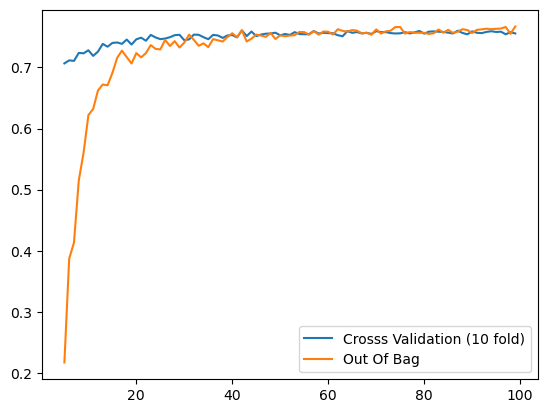

In [69]:
plt.plot(tree_range, test_error, label = "Crosss Validation (10 fold)");
plt.plot(tree_range, oob_error, label = "Out Of Bag");
plt.legend();

Lorsque la forêt contient peu d'arbres, on note que certaines observations ne sont dans auncun des échantillons OOB, d'où les warnings.

Lorsque le nombre d'arbres est suffisamment grand, le score OOB finit par dépasser le score évalué par validation croisée. Ce phénomène peut s'expliquer par le fait que dans le cas OOB, nous utilisons toutes les données pour construire la forêt aléatoire, alors que dans le cas de la validation croisée, les forêts aléatoires ne sont construites que sur les 4/5 ième des données, il est donc naturel que les performances soient supérieures dans le premier cas.

Pour ce qui concerne maintenant les performances de la méthode OOB, en tant que méthode d'estimation de l'erreur de généralisation, la littérature récente (voir par exemple les conclusions de [cette étude](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0201904)) indique que cette méthode tend à surestimer l'erreur de généralisation. Il s'agit d'un sujet de recherche encore ouvert. 


On note dans le modèle précédent que pour centaine d'arbres, le score de la forêt aléatoire tend à ce stabiliser un plateau. On va donc garder `n_estimators= 100`dans la suite, même si dans l'idéal il faudrait aussi faire varier ce paramètre dans ce qui suit.

> Pour améliorer les performances du modèle de forêts aléaoires à 50 arbres ajusté, déterminer via une estimation des erreurs OOB sur les grilles de paramètres proposées.   
>        - le meilleur paramètre `max_leaf_nodes`   
>        - le meilleur paramètre `max_features`    
> - Evaluer la qualité du modèle choisi sur l'échantillon test `X_housing_test, y_housing_test`.

Noter que la fonction `GridSearchCV`, qui par définition effectue des validations croisées, n'est pas adaptée pour cette recherche de paramètres par évaluation de l'erreur out of bag.

In [91]:
max_leaf_nodes_grid = [2,4,6,8,10,15,20,30,50,100,200,300,400,500,800]
max_features_grid=range(2,9)

start = time()
oob_error = {}
for max_leaf_nodes in max_leaf_nodes_grid:
    for max_features in max_features_grid:
        RF = RandomForestRegressor(n_estimators = 100, max_features = max_features, max_leaf_nodes = max_leaf_nodes, oob_score = True)
        RF.fit(X_housing_mini, y_housing_mini)
        oob_error[(max_leaf_nodes, max_features)] = RF.oob_score_
print(str(time() - start)+ " sec")

28.294461965560913 sec


In [92]:
best_score = max(oob_error.values())
best_parameters = [i for i in oob_error if oob_error[i] == best_score][0]
print(f"Les meilleurs paramètres sont:")
print(f"\tmax_leaf_nodes = {best_parameters[0]}")
print(f"\tmax_features = {best_parameters[1]}")

Les meilleurs paramètres sont:
	max_leaf_nodes = 500
	max_features = 3


> Faire de même pour des bagging trees (toujours pour 100 arbres) et comparer les performances des deux modèles ainsi ajustés. En effet, il est aussi possible de calculer une erreur OOB et il est aussi possible de faire varier `max_features` (et `max_leaf_nodes`) pour les bagging trees.

In [96]:
max_leaf_nodes_grid = [2,4,6,8,10,15,20,30,50,100,200,300,400,500,800]
max_features_grid=range(2,9) 


start = time()
oob_error = {}
for max_leaf_nodes in max_leaf_nodes_grid:
    for max_features in max_features_grid:
        bagTree = BaggingRegressor(base_estimator = DecisionTreeRegressor(max_features = max_features, max_leaf_nodes = max_leaf_nodes), max_features = max_features, n_estimators = 100, oob_score = True)
        bagTree.fit(X_housing_mini, y_housing_mini)
        oob_error[(max_leaf_nodes, max_features)] = bagTree.oob_score_
print(str(time() - start)+ " sec")

30.575302362442017 sec


In [97]:
best_score = max(oob_error.values())
best_parameters = [i for i in oob_error if oob_error[i] == best_score][0]
print(f"Les meilleurs paramètres sont:")
print(f"\tmax_leaf_nodes = {best_parameters[0]}")
print(f"\tmax_features = {best_parameters[1]}")

Les meilleurs paramètres sont:
	max_leaf_nodes = 800
	max_features = 6


# Importance des variables dans une forêt


##### Importance au sens de Gini

> Pour le modèle de forêt aléatoire sélectionné ci-dessus, afficher les [importances des variables au sens de Gini](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_).

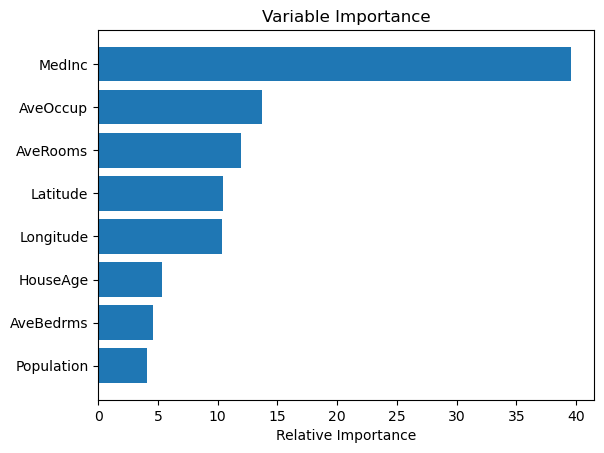

In [107]:
RF = RandomForestRegressor(n_estimators = 100, max_features = 3, max_leaf_nodes = 500)
RF.fit(X_housing_mini, y_housing_mini)
feature_importance = RF.feature_importances_

feature_importance = 100.0 * (feature_importance / sum(feature_importance))
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, [housing.feature_names[u] for u in sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance');